# Parts 1 and 2- Pandas and Statistics

---

# Part 1 - Pre-processing and exploratory analysis

In [1]:
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from datetime import date
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as multi 
from scipy.stats import ttest_ind
import statsmodels.api as sm

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [ ]:
df =  pd.read_csv('listings.csv')

In [4]:
df = load_csv(basedir)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,20201212211823,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,20201212211823,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.68


## Question 1a

In [5]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.
def drop_cols(df):
    ''' Takes a dataframe as an input. Returns a reduced dataframe, by dropping specific columns.

    Parameters
    ----------
    df: pandas.DataFrame
        The Airbnb dataframe
        
    Returns
    ----------
    df: pandas.DataFrame
        Reduced dataframe where columns:
            'scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped', 
            'amenities','neighborhood_overview', 'picture_url','host_url', 'host_about',
            'host_location','host_total_listings_count','host_thumbnail_url','host_picture_url',
            'host_verifications','bathrooms_text','has_availability','minimum_minimum_nights','maximum_minimum_nights',
            'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
            'number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
            'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'
        have been dropped from the dataframe.
    '''
    df = df.drop(columns = ['scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped', 
    'amenities','neighborhood_overview', 'picture_url','host_url', 'host_about',
    'host_location','host_total_listings_count','host_thumbnail_url','host_picture_url',
    'host_verifications','bathrooms_text','has_availability','minimum_minimum_nights','maximum_minimum_nights',
    'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
    'number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'])

    return df

In [6]:
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [7]:
def drop_cols_na(df, threshold=0.5):
    ''' Drops colums from a dataframe depending on the proportion of NaN values in the column, depending on a threshold value

    Parameters
    ----------
    df: pandas.DataFrame
    
    threshold: float, optional
        float between 0 and 1
        equal to 0.5 if not given
        
    Returns
    ----------
    df: pandas.DataFrame
        If the proportion of NaNs in a column is equal or larger than the threshold,
        the respective columns is dropped. The new dataframe is returned.
    '''
    
    if threshold < 0 or threshold > 1:
        print('Threshold is smaller than 0 or bigger than 1, default threshold of 0.5 will be used.')
        threshold = 0.5
    df = df.loc[:,df.isnull().mean() < threshold]
    return df

In [8]:
df = drop_cols_na(df)

## Question 1b

In [9]:
#df = df.replace('f',int(0))
#df = df.replace('t',int(1))

# try
#df = df.replace('f',0.astype(int))
#df = df.replace('t',1.astype(int))

In [10]:
#def binary_encoding(df):
 #   df = df.replace(['t','f'],[int(1),int(0)]) # gives a float instead of an integer
  #  return df

In [11]:
def binary_encoding(df):
    ''' 
    Replaces values 't' and 'f' with 1 and 0, respectively 

    Parameters
    ----------
    df: pandas.DataFrame
      Airbnb dataframe
   
    Returns
    ----------
    df: pandas.DataFrame
        Returns dataframe with values 't' and 'f' replaced with 1 and 0, respectively
    '''
       
    # loops through all values in specified column if the value = 't' it is replaced by 1
    for i in range(len(df)):
        if df.iloc[i,6] == 't':
            df.iloc[i,6] = 1
        if df.iloc[i,6] == 'f':
            df.iloc[i,6] = 0
        if df.iloc[i,9] == 't':
            df.iloc[i,9] = 1
        if df.iloc[i,9] == 'f':
            df.iloc[i,9] = 0 
        if df.iloc[i,10] == 't':
            df.iloc[i,10] = 1
        if df.iloc[i,10] == 'f':
            df.iloc[i,10] = 0 
        if df.iloc[i,37] == 't':
            df.iloc[i,37] = 1
        if df.iloc[i,37] == 'f':
            df.iloc[i,37] = 0 
    return df

In [12]:
df = binary_encoding(df)

In [13]:
# hint: check Pandas to_datetime method
def add_host_days(df):
    ''' 
    Adds column host_days to df. host days is the number of days that a host has
    been registered

    Parameters
    ----------
    df: pandas.DataFrame
      Airbnb dataframe
   
    Returns
    ----------
    df: pandas.DataFrame
        Dataframe with host_days added 
    
    '''
    days = pd.to_datetime(date.today()) - pd.to_datetime(df['host_since'])
    df['host_days'] = days.dt.days # gets the days between
    return df

In [14]:
def convert_price(df):
    ''' 
    Converts the values in the 'price' column from a string to a float.
    for example '$40' becomes 40.0

    Parameters
    ----------
    df: pandas.DataFrame
      Airbnb dataframe
   
    Returns
    ----------
    df: pandas.DataFrame
        Dataframe with values in price column replaced by floats 
    
    '''
    # loop through all values in price column
    for i in range(len(df['price'])):
        # delete $ in all values
        df['price'][i] = df['price'][i].replace(df['price'][i],df['price'][i][1:].replace(',',''))
    df['price'] = df['price'].astype(float) #convert to float
    return df

In [15]:
df = add_host_days(df)
df = convert_price(df)

<ipython-input-14-342f1ed919c5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][i] = df['price'][i].replace(df['price'][i],df['price'][i][1:].replace(',',''))


## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [16]:
# How many hosts offer 2 or more properties for rent?
sum(df['host_id'].value_counts() > 1)

1331

In [17]:
# What is the highest price for a listing?
max(df['price'])

8000.0

In [18]:
# What is the ID of the listing that has the largest number of bedrooms?
df['id'][df['bedrooms'] == max(df['bedrooms'])].index[0]

18352

In [19]:
# What is the ID of the listing with the largest advertised price
df['id'][df['price']==max(df['price'])]

88         258273
10972    21946106
Name: id, dtype: int64

In [20]:
# There are different room types. How many listings are there for the most common room type?
df['room_type'].value_counts()[0]

14433

In [21]:
# How many hosts are there that have been registered for more than 3000 days?
sum(df['host_days'].unique() > 3000)

744

### Missing values

Clean the missing values as linear regression requires clean
data

In [22]:
len(df)

18522

In [23]:
df.isnull().mean()

id                             0.000000
name                           0.001782
host_id                        0.000000
host_name                      0.002969
host_since                     0.002969
host_acceptance_rate           0.499676
host_is_superhost              0.002969
host_neighbourhood             0.334899
host_listings_count            0.002969
host_has_profile_pic           0.002969
host_identity_verified         0.002969
neighbourhood_cleansed         0.000000
latitude                       0.000000
longitude                      0.000000
property_type                  0.000000
room_type                      0.000000
accommodates                   0.000000
bedrooms                       0.054746
beds                           0.005777
price                          0.000000
minimum_nights                 0.000000
maximum_nights                 0.000000
availability_30                0.000000
availability_60                0.000000
availability_90                0.000000


I will remove the `host_acceptance_rate`, `host_neighbourhood`, `first_review` and `last_review` columns, as they have a siginificant number of NaN values. 

In [24]:
# to delete host_acceptance_rate and host_neighbourhood
df = drop_cols_na(df,0.3) # threshold=0.3 as both columns have more than 30% of the values as NaNs
# delete first_review and last_review
df = df.drop(['first_review','last_review'],axis=1)

Replace missing values in: `review_scores_rating`,`review_scores_accuracy`,`review_scores_cleanliness`,`review_scores_checkin`,`review_scores_communication`, `review_scores_location`, `review_scores_value`,`reviews_per_month`and `host_days`with the mean

In [25]:
# imputes the missing values with the mean
df=df.fillna(df.mean())

Finally remove the remaining rows with NaN values 

In [26]:
# deletes the rows with missing values in them
df = df.dropna(axis=0)

In [27]:
len(df)

18434

In [28]:
df.isnull().mean() #check if missing values have been cleaned

id                             0.0
name                           0.0
host_id                        0.0
host_name                      0.0
host_since                     0.0
host_is_superhost              0.0
host_listings_count            0.0
host_has_profile_pic           0.0
host_identity_verified         0.0
neighbourhood_cleansed         0.0
latitude                       0.0
longitude                      0.0
property_type                  0.0
room_type                      0.0
accommodates                   0.0
bedrooms                       0.0
beds                           0.0
price                          0.0
minimum_nights                 0.0
maximum_nights                 0.0
availability_30                0.0
availability_60                0.0
availability_90                0.0
availability_365               0.0
number_of_reviews              0.0
number_of_reviews_ltm          0.0
review_scores_rating           0.0
review_scores_accuracy         0.0
review_scores_cleanl

### reset index

In [29]:
df = df.reset_index(drop=True)

## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

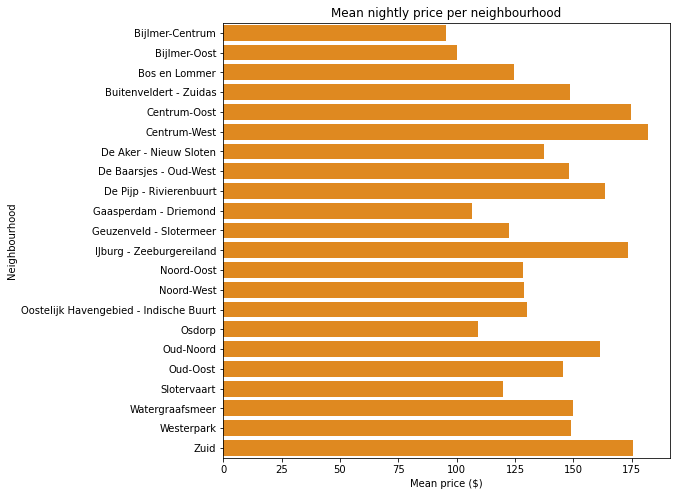

In [30]:
# calculate the mean price of each neighbourhood
data = df.groupby('neighbourhood_cleansed')['price'].mean()

#plot
fig,ax = plt.subplots(figsize=[8,8])
ax = sns.barplot(x=data,y=data.index, color='darkorange')
ax.set(ylabel="Neighbourhood", xlabel="Mean price ($)",title='Mean nightly price per neighbourhood')
plt.show()

Plot a correlation matrix as instructed in the Coursework proforma:

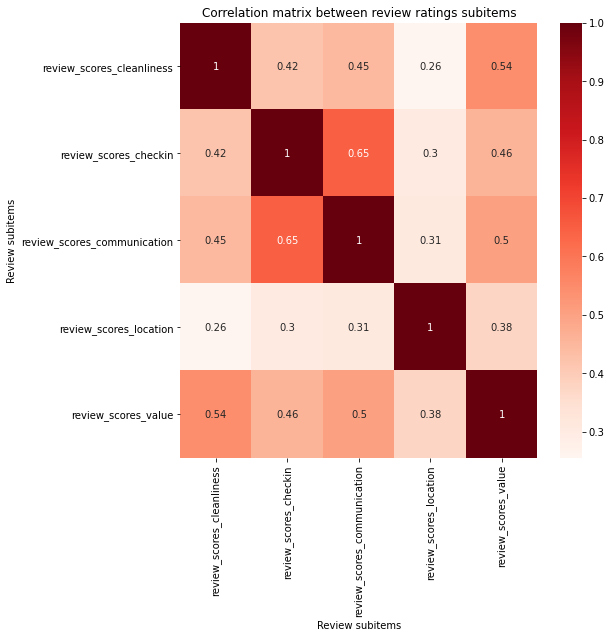

In [31]:
# columns specified in question
columns = ['review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
          'review_scores_value'] 
fig,ax = plt.subplots(figsize=[8,8])
# calculate pairwise correlations between variables
corl = df[columns].corr()
ax = sns.heatmap(corl,annot = True, cmap="Reds")
ax.set(ylabel="Review subitems", xlabel="Review subitems",title='Correlation matrix between review ratings subitems')
plt.show()

Plot a geographical distribution as instructed in the Coursework proforma:

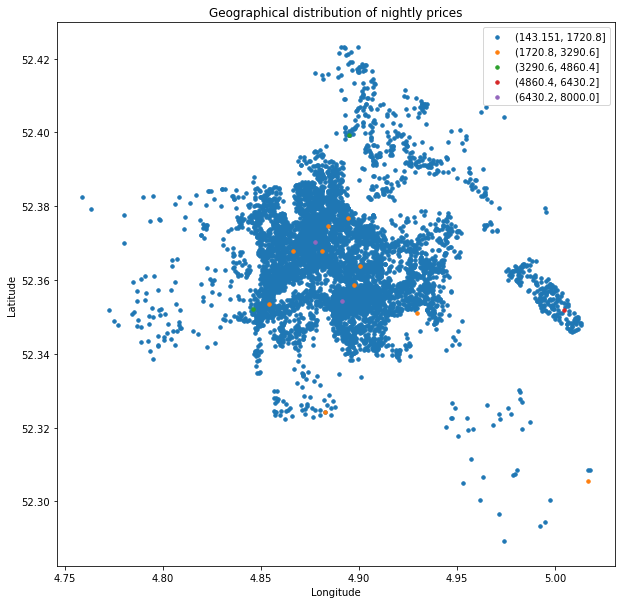

In [32]:
# create new dataframe with columns needed
scatter_df = df[['price','latitude','longitude']]
scatter_df = scatter_df[scatter_df['price']>150] # price above 150 per night

#group based on price
scatter_df['price'] =pd.cut(scatter_df['price'],5)
groups = scatter_df.groupby('price')

#plot scatter plot
fig, ax = plt.subplots(figsize=[10,10])
ax.set(ylabel="Latitude", xlabel="Longitude",title='Geographical distribution of nightly prices')
for name,group in groups:
    ax.scatter(group.longitude, group.latitude, s=12, label=name)
    ax.legend()

---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests


`review_scores_rating` is the target variable

`review_scores_accuracy`, `review_scores_cleanliness`,`review_scores_checkin`, `review_scores_communication`,`review_scores_location`,`review_scores_value` are the features

In [33]:
#create new df for the linear regression
reg_df = df.iloc[:,26:33]

#rename columns for convenience
reg_df['rating'] = reg_df['review_scores_rating']
reg_df['accuracy'] = reg_df['review_scores_accuracy']
reg_df['cleanliness'] = reg_df['review_scores_cleanliness']
reg_df['checkin'] = reg_df['review_scores_checkin']
reg_df['communication'] = reg_df['review_scores_communication']
reg_df['location'] = reg_df['review_scores_location']
reg_df['value'] = reg_df['review_scores_value']

# subset to include just the new column names
reg_df = reg_df.iloc[:,7:]

In [34]:
print(sm.OLS.from_formula('rating ~ accuracy', reg_df).fit().rsquared)
print(sm.OLS.from_formula('rating ~ cleanliness', reg_df).fit().rsquared)
print(sm.OLS.from_formula('rating ~ checkin', reg_df).fit().rsquared)
print(sm.OLS.from_formula('rating ~ communication', reg_df).fit().rsquared)
print(sm.OLS.from_formula('rating ~ location', reg_df).fit().rsquared)
print(sm.OLS.from_formula('rating ~ value', reg_df).fit().rsquared)

0.5139387105465766
0.46825999110807703
0.33856885642353984
0.4052997363768065
0.13428884340012037
0.46873454696958616


accuracy yields the best r squared

In [35]:
# first fit the model with no interaction terms
fit = sm.OLS.from_formula('rating ~ accuracy + cleanliness + checkin + communication + location + value', reg_df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     8027.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:32:45   Log-Likelihood:                -48608.
No. Observations:               18434   AIC:                         9.723e+04
Df Residuals:                   18427   BIC:                         9.729e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3574      0.515     -0.694

All terms are siginificant (p-value < 0.05)

Fit model with all interaction terms

In [36]:
fit = sm.OLS.from_formula('rating ~ accuracy + cleanliness + checkin + communication + location + value + accuracy * cleanliness + accuracy * checkin + accuracy * communication + accuracy * location + accuracy * value + cleanliness * checkin + cleanliness * communication + cleanliness * location + cleanliness * value + checkin * communication + checkin * location + checkin * value + communication * location + communication * value + location * value', reg_df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     2391.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:32:45   Log-Likelihood:                -48324.
No. Observations:               18434   AIC:                         9.669e+04
Df Residuals:                   18412   BIC:                         9.686e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

`cleanliness:communication`, `communication:value`,`communication:location`,`accuracy:location`,`checkin` and `location` are 
not significant.

**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences): 

At the significance level of alpha = 0.01 the t test suggests:
* Private room and Entire home/apt are significantly different, with a t-statistic=-25.14 and p-value=0.00
* Private room and hotel room are significantly different, with a t-statistic=-10.53 and p-value=0.00
* Entire home/apt and Shared room are significantly different, with a t-statistic=3.07 and p-value=0.00


Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences): 

Yes, Entire home/apt and Shared room changes with the Bonferroni correction. We no longer can reject the null hypothesis,
and conclude that the mean nightly price between entire home/apt and shared room are not significantly different.


In [37]:
df['room_type'].unique() # find the different types of room

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [38]:
df_pr = df[df.room_type=='Private room']['price']
df_eh = df[df.room_type=='Entire home/apt']['price']
df_hr = df[df.room_type=='Hotel room']['price']
df_sr = df[df.room_type=='Shared room']['price']

# calculate the mean price for each room type
print('Private room price mean: {:.2f}'.format(df_pr.mean()))
print('Entire home/apt price mean: {:.2f}'.format(df_eh.mean()))
print('Hotel room price mean: {:.2f}'.format(df_hr.mean()))
print('Shared room price mean: {:.2f}'.format(df_sr.mean()))


Private room price mean: 93.74
Entire home/apt price mean: 170.77
Hotel room price mean: 131.75
Shared room price mean: 105.00


In [39]:
pr_eh = ttest_ind(df_pr, df_eh) # t test
#print the t statistic and p-value
print('Private room and Entire home/apt: t-statistic: {:.2f}, p-value: {:.3f}'.format(pr_eh.statistic,pr_eh.pvalue))

pr_hr = ttest_ind(df_pr, df_hr)
print('Private room and hotel room: t-statistic: {:.2f}, p-value: {:.3f}'.format(pr_hr.statistic,pr_hr.pvalue))

pr_sr = ttest_ind(df_pr, df_sr)
print('Private room and Shared room: t-statistic: {:.2f}, p-value: {:.3f}'.format(pr_sr.statistic,pr_sr.pvalue))

eh_hr = ttest_ind(df_eh, df_hr)
print('Entire home/apt and hotel room: t-statistic: {:.2f}, p-value: {:.3f}'.format(eh_hr.statistic,eh_hr.pvalue))

eh_sr = ttest_ind(df_eh, df_sr)
print('Entire home/apt and Shared room: t-statistic: {:.2f}, p-value: {:.3f}'.format(eh_sr.statistic,eh_sr.pvalue))

sr_hr = ttest_ind(df_sr, df_hr)
print('Shared room and hotel room: t-statistic: {:.2f}, p-value: {:.3f}'.format(sr_hr.statistic,sr_hr.pvalue))

Private room and Entire home/apt: t-statistic: -29.21, p-value: 0.000
Private room and hotel room: t-statistic: -4.01, p-value: 0.000
Private room and Shared room: t-statistic: -0.75, p-value: 0.453
Entire home/apt and hotel room: t-statistic: 2.98, p-value: 0.003
Entire home/apt and Shared room: t-statistic: 3.06, p-value: 0.002
Shared room and hotel room: t-statistic: -1.01, p-value: 0.312


In [40]:
pr_pr = ttest_ind(df_pr, df_pr)
eh_eh = ttest_ind(df_eh, df_eh)
hr_hr = ttest_ind(df_hr, df_hr)
sr_sr = ttest_ind(df_sr, df_sr)


pvalues = [pr_eh.pvalue,pr_hr.pvalue,pr_sr.pvalue,eh_hr.pvalue,eh_sr.pvalue,sr_hr.pvalue,pr_pr.pvalue,eh_eh.pvalue,
          hr_hr.pvalue,sr_sr.pvalue]
# bonferroni correction applied to all p-values
bon = multi.multipletests(pvalues,alpha=0.01,method='bonferroni')
print(bon)

(array([ True,  True, False, False, False, False, False, False, False,
       False]), array([2.35052398e-182, 6.13332607e-004, 1.00000000e+000, 2.91355408e-002,
       2.18946205e-002, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000]), 0.0010045287082499632, 0.001)


In [42]:
rooms = df['room_type'].unique()

#private room
private = [bon[1][5],bon[1][0],bon[1][1],bon[1][2]]
#round the numbers
private = [round(num, 2) for num in private]

#home room
home = [bon[1][0],bon[1][6],bon[1][3],bon[1][4]]
#round the numbers
home = [round(num, 2) for num in home]

# hotel room
hotel = [bon[1][1],bon[1][3],bon[1][7],bon[1][5]]
#round the numbers
hotel = [round(num, 2) for num in hotel]

# shared room
shared = [bon[1][2],bon[1][4],bon[1][5],bon[1][8]]
#round the numbers
shared = [round(num, 2) for num in shared]

pd.DataFrame([private,home,hotel,shared],columns=rooms,index=rooms)

,Private room,Entire home/apt,Hotel room,Shared room
Private room,1.0,0.00,0.00,1.00
Entire home/apt,0.0,1.00,0.03,0.02
Hotel room,0.0,0.03,1.00,1.00
Shared room,1.0,0.02,1.00,1.00


## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

YOUR ANSWER: 

Removed `id`, `name`, `host_id` and `host_name` as they significant predictors {check}

Removed `host_since` as `host_days` is `host_since` preprocessed 

Removed `neighbourhood_cleansed` and `property_type` to avoid overfitting.

In [43]:
linear_df = df

In [44]:
linear_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'host_days'],
      dtype='object')

Remove `id`, `name`, `host_id`, `host_name`, `host_since` as they are not useful.

In [45]:
linear_df =linear_df.iloc[:,5:]

drop `neighbourhood_cleansed` and `property_type`

In [46]:
linear_df = linear_df.drop(['neighbourhood_cleansed','property_type'], axis=1)

`room_type` needs to be dummied.

In [47]:
# convert room type to dummy variable
linear_df = pd.get_dummies(linear_df,columns=['room_type'])
#rename columns
linear_df = linear_df.rename(columns={'room_type_Entire home/apt':'room_type_entire_home_apt','room_type_Hotel room':'room_type_hotel_room',
                  'room_type_Private room':'room_type_private_room','room_type_Shared room':'room_type_shared_room'})

# remove one variable so we have n-1 variables to avoid multicollinearity 
linear_df = linear_df.iloc[:,:33]

In [48]:
def variable_selection(df, target,alpha):
    """
    Function which selects the best variables for linear regression. There are
    two steps:
    First step is to build a model by adding variables one after the other. 
    Only variables that increase the adjusted R^2 coefficient will be added
    to the model
    Second step takes the model created in step one and the coefficients 
    which have p-values larger than the alpha level will be removed from the 
    model

    Parameters:
    -----------
    df: pandas.DataFrame
      Airbnb dataframe, with target and features included

    target: string
      target variable for the regression

    alpha: float
      Chosen significance (alpha) level 

    Returns:
    --------
    model: Model instance
      an "optimal" fitted statsmodels linear model with an intercept 
      selected by forward selection evaluated by adjusted R-squared and with 
      coefficients that have p-values lower the the significance (alpha) level
    """
    # column names as a set
    remaining = set(df.columns)
    # remove target column name from remaining
    remaining.remove(target)
    selected = [] # selected predictors
    current_score, best_new_score = 0.0, 0.0
    # while loop to run until the score does not improve
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        # loop through the remaining predictors 
        for candidate in remaining:
          # formula to use in regression
            formula = "{} ~ {} + 1".format(target,
                                           ' + '.join(selected + [candidate]))
            # fit model and calculate adjusted R squared
            score = smf.ols(formula, df).fit().rsquared_adj
            # add adj R squared to the list
            scores_with_candidates.append((score, candidate))
        # sort the list in ascending order
        scores_with_candidates.sort()
        # assigns the last item in the list
        best_new_score, best_candidate = scores_with_candidates.pop() 
        # if the current score is less than the best score
        # add the predictor to another list
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    # formula with the predictors which improve the adjusted R squared value
    formula = "{} ~ {} + 1".format(target,
                                   ' + '.join(selected))
    model = smf.ols(formula, df).fit()
    #second step remove values with pvalues higher than alpha level
    while True:
        pvalues = model.pvalues
        #find largest p value
        max_pvalue = max(pvalues)
        # if the p value is larger than the significance level of alpha =0.05
        if max_pvalue > alpha:
            index = [i for i, x in enumerate(pvalues) if x == max_pvalue]
            # remove variable from list of predictors 
            del selected[index[0]-1]

            # refits the model
            formula = "{} ~ {} + 1".format(target,
                                   ' + '.join(selected))
            model = smf.ols(formula, df).fit()
        # when all pvalues are below alpha level
        else: 
            break
     
    return model

In [49]:
model = variable_selection(linear_df,'price',0.05)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     188.0
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:32:57   Log-Likelihood:            -1.1689e+05
No. Observations:               18434   AIC:                         2.338e+05
Df Residuals:                   18415   BIC:                         2.340e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    6987.1689   3209.456      2.177      0.029     696.337    1.33e+04
accommodates                   29.1862      1.109     26.311      0.000      27.012      31.360
room_type_private_room        -21.3190     10.231     -2.084      0.037     -41.373      -1.265
availability_365                0.0770      0.014      5.611      0.000       0.050       0.104
review_scores_location         18.3730      1.725     10.650      0.000      14.992      21.754
number_of_reviews_ltm          -0.8673      0.152     -5.695      0.000      -1.166      -0.569
bedrooms                       11.0707      1.522      7.273      0.000       8.087      14.054
host_listings_count             0.3896      0.073      5.323      0.000       0.246       0.533
minimum_nights                  0.3995      0.071      5.592      0.000       0.260       0.540
availability_30                 0.7191      0.151      4.772      0.000       0.424       1.014
review_scores_value           -10.6969      1.881     -5.688      0.000     -14.383      -7.011
review_scores_cleanliness       4.7369      1.681      2.817      0.005       1.441       8.032
number_of_reviews              -0.0757      0.024     -3.141      0.002      -0.123      -0.028
room_type_entire_home_apt      29.4214     10.197      2.885      0.004       9.433      49.409
review_scores_communication    -7.3900      2.310     -3.199      0.001     -11.918      -2.862
review_scores_rating            0.7696      0.278      2.766      0.006       0.224       1.315
instant_bookable                6.9290      2.505      2.766      0.006       2.019      11.839
host_days                       0.0035      0.001      2.507      0.012       0.001       0.006
latitude                     -135.3908     61.291     -2.209      0.027    -255.527     -15.255
==============================================================================
Omnibus:                    46311.817   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1349009983.528
Skew:                          27.417   Prob(JB):                         0.00
Kurtosis:                    1327.132   Cond. No.                     7.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [50]:
def recommend_neighbourhood(df,budget_min,budget_max,relative):
    '''
    Function which recommends which neighbourhood best fits the budget 
    requirements. Recommends the neighbourhood based on absolute or relative
    number of listings in the neighbourhood

    Parameters:
    -----------
    df: pandas.DataFrame
      Airbnb dataframe

    budget_min: float
      minimum budget requirement 

    budget_max: float
      maximum budget requirement

    relative: boolean
      relative = True - returns the neighbourhod with the highest relative
      number of listings in the neighbourhood for the budget requirements
      relative = False - returns the neighbourhood with the highest absolute
      number of listings in the neighbourhood for the budget requirements

    Returns:
    --------
    result: string
      the recommended neighbourhood
      
    '''
    # relative equals absolute 
    if relative == False:

        absol= df[df['price'] >= budget_min]
        absol = absol[absol['price'] <= budget_max]['neighbourhood_cleansed']
        result = absol.value_counts().index[0]
        
    # find the relative number
    else:
        rel= df[df['price'] >= budget_min]
        rel = rel[rel['price'] <= budget_max]['neighbourhood_cleansed']

        relative_count= rel.value_counts()
        total_count = df['neighbourhood_cleansed'].value_counts()

        # create data frames
        total_count = pd.DataFrame(total_count).reset_index(level=0)
        relative_count = pd.DataFrame(relative_count).reset_index(level=0)

        # merge the two data frames, based on the neighbourhood name
        data = total_count.merge(relative_count,how='left',on='index',suffixes=('_total', '_relative'))
        data = data.fillna(0)
        # calculate the relative number
        data['Result'] = data['neighbourhood_cleansed_relative']/data['neighbourhood_cleansed_total']

        # sort to find largest percentage
        data = data.sort_values('Result',ascending=False)
        # save the result in variable 
        result = data.iloc[0,0]
        
    return result

In [51]:
#example
recommend_neighbourhood(df,600,1000,True)

'Centrum-West'

### Price recommender for hosts

In [52]:
def recommend_price(df,latitude,longitude,n_neighbours,room_type=None):
    '''
    Function which recommends the price a host should list their property,
    based upon its location, a given number of neighbours and the room type

    Parameters:
    -----------
    df: pandas.DataFrame
      Airbnb dataframe

    latitude: float
      latitude coordinate

    longitude: float
      longitude coordinate

    room_type: string, optional
      Default = None
      filter the listings by room type. Defaulted at None, which looks at
      all room types

    Returns:
    --------
    mean_price: float
      The mean price of the closest N neighbours 
      
    '''
    # consider all room types
    if room_type == None: 
    
        lat_distances = []
        long_distances = []

        for lat in df['latitude']:
            #calculate the distance
            lat_distances.append(latitude-lat)

        for long in df['longitude']:
            #calculate the distance
            long_distances.append(longitude-long)

        #create df with latitute and longitude
        dist = pd.DataFrame(lat_distances,long_distances).reset_index(level=0)
        dist['latitude'] = dist['index']
        dist['longitude'] = dist[0]
        dist = dist.iloc[:,2:4]

        # calculate distance via pythag theorem
        distance = []
        for lat,long in zip(dist['latitude'],dist['longitude']):
            distance.append(np.sqrt((lat)**2 + (long)**2))

        dist['distance'] = distance
        dist['price'] = df['price']
        #sort df by distance in ascending order
        dist = dist.sort_values('distance')
        # calculate the mean price of the N closest listings
        mean_price = dist.head(n_neighbours)['price'].mean()

    else:
        # filters the df to have only the specfied room type contained
        df = df[df['room_type']  == room_type]
        
        lat_distances = []
        long_distances = []

        for lat in df['latitude']:
            #calculate the distance
            lat_distances.append(latitude-lat)

        for long in df['longitude']:
            #calculate the distance
            long_distances.append(longitude-long)

        #create df with latitute and longitude
        dist = pd.DataFrame(lat_distances,long_distances).reset_index(level=0)
        dist['latitude'] = dist['index']
        dist['longitude'] = dist[0]
        dist = dist.iloc[:,2:4]

        # calculate distance via pythag theorem
        distance = []
        for lat,long in zip(dist['latitude'],dist['longitude']):
            distance.append(np.sqrt((lat)**2 + (long)**2))

        dist['distance'] = distance
        dist['price'] = df['price']
        #sort df by distance in ascending order
        dist = dist.sort_values('distance')
        # calculate the mean price of the N closest listings
        mean_price = dist.head(n_neighbours)['price'].mean()

    return mean_price

In [53]:
#example
recommend_price(df,50,5,10,'Private room')

72.0